ИУ5И-23М Чжан Мяо

In [8]:
# 安装必要的库
!pip install pandas scikit-learn matplotlib seaborn

# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_diabetes

# 加载数据集
data = load_diabetes(as_frame=True)
df = data.frame
df['target'] = data.target

# 查看数据集信息
print("数据集基本信息：")
print(df.info())
df.head()


数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


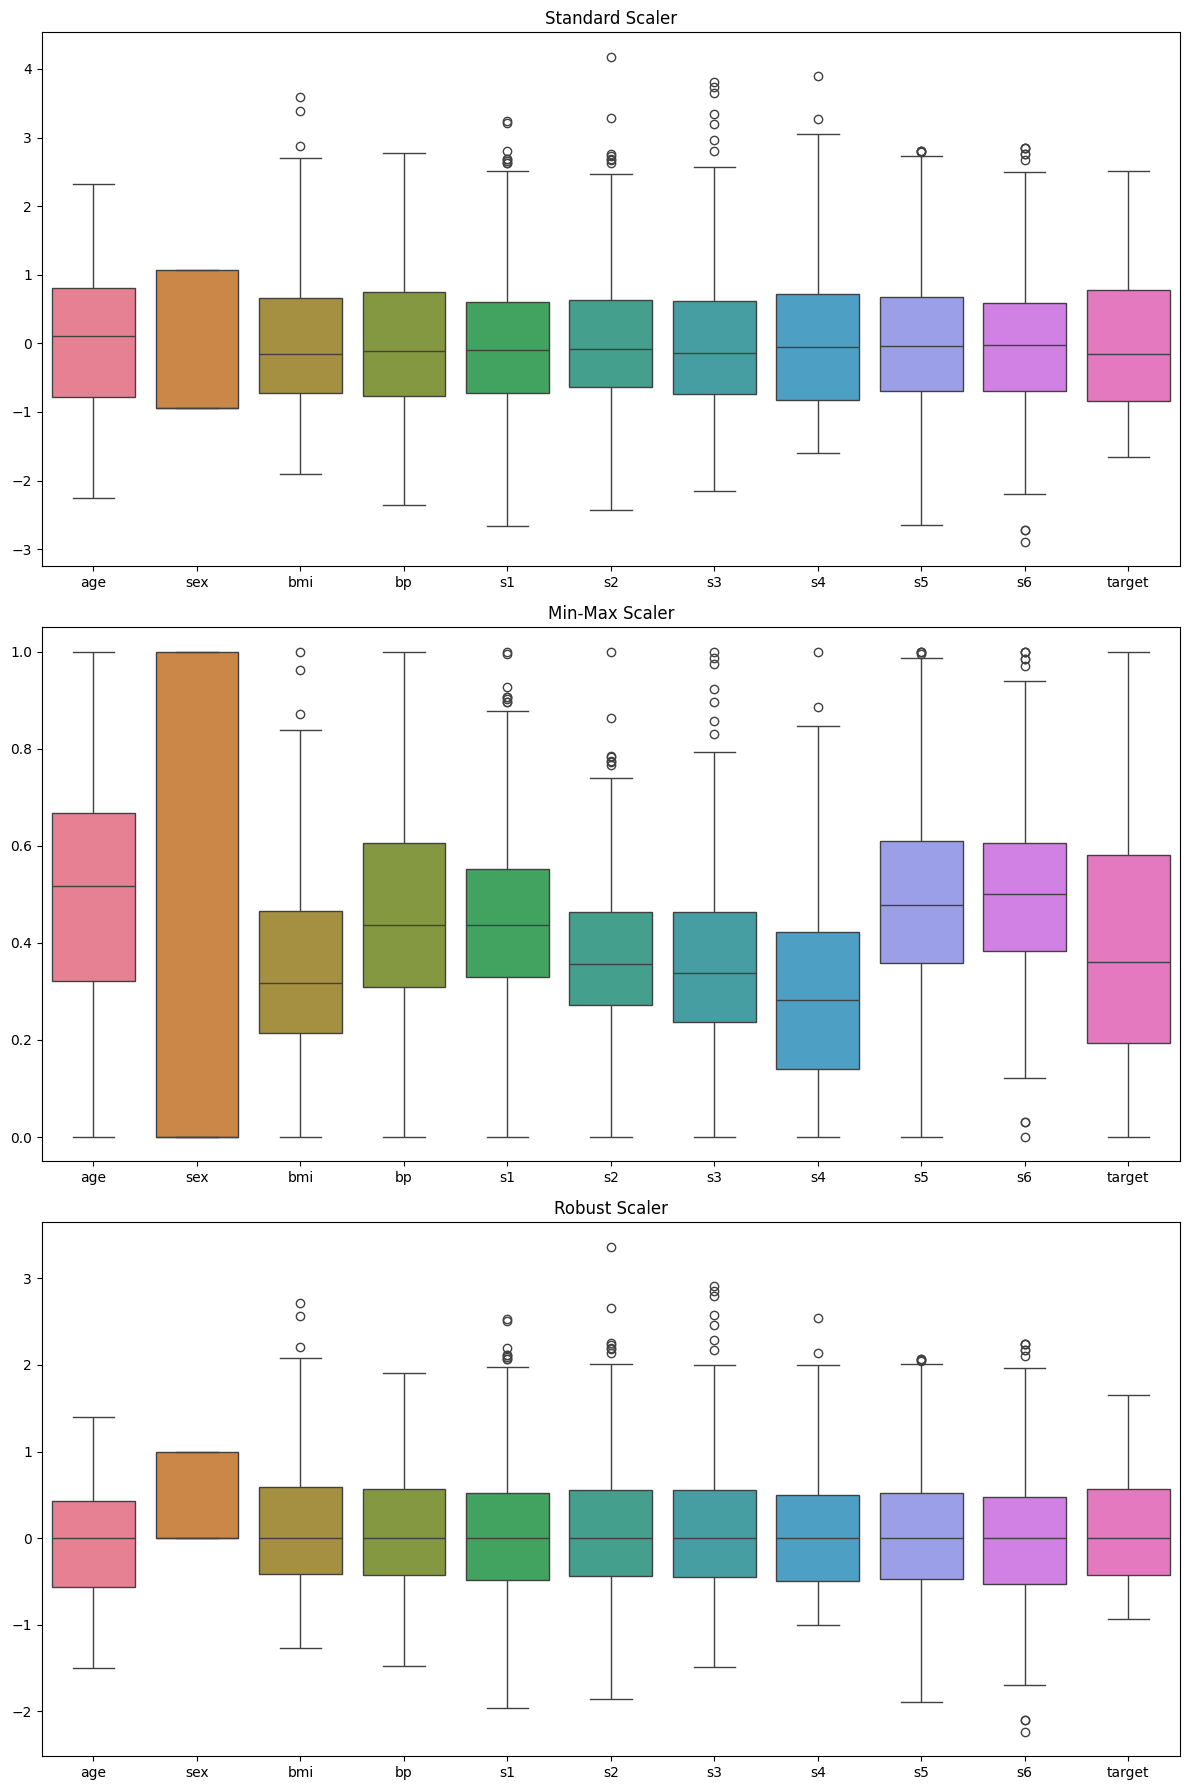

In [9]:
# 标准化缩放
scaler_standard = StandardScaler()
df_standard = df.copy()
df_standard[df.columns] = scaler_standard.fit_transform(df)

# 最小-最大缩放
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[df.columns] = scaler_minmax.fit_transform(df)

# Robust 缩放
scaler_robust = RobustScaler()
df_robust = df.copy()
df_robust[df.columns] = scaler_robust.fit_transform(df)

# 绘制缩放后的数据分布图
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sns.boxplot(data=df_standard, ax=axes[0])
axes[0].set_title('Standard Scaler')
sns.boxplot(data=df_minmax, ax=axes[1])
axes[1].set_title('Min-Max Scaler')
sns.boxplot(data=df_robust, ax=axes[2])
axes[2].set_title('Robust Scaler')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


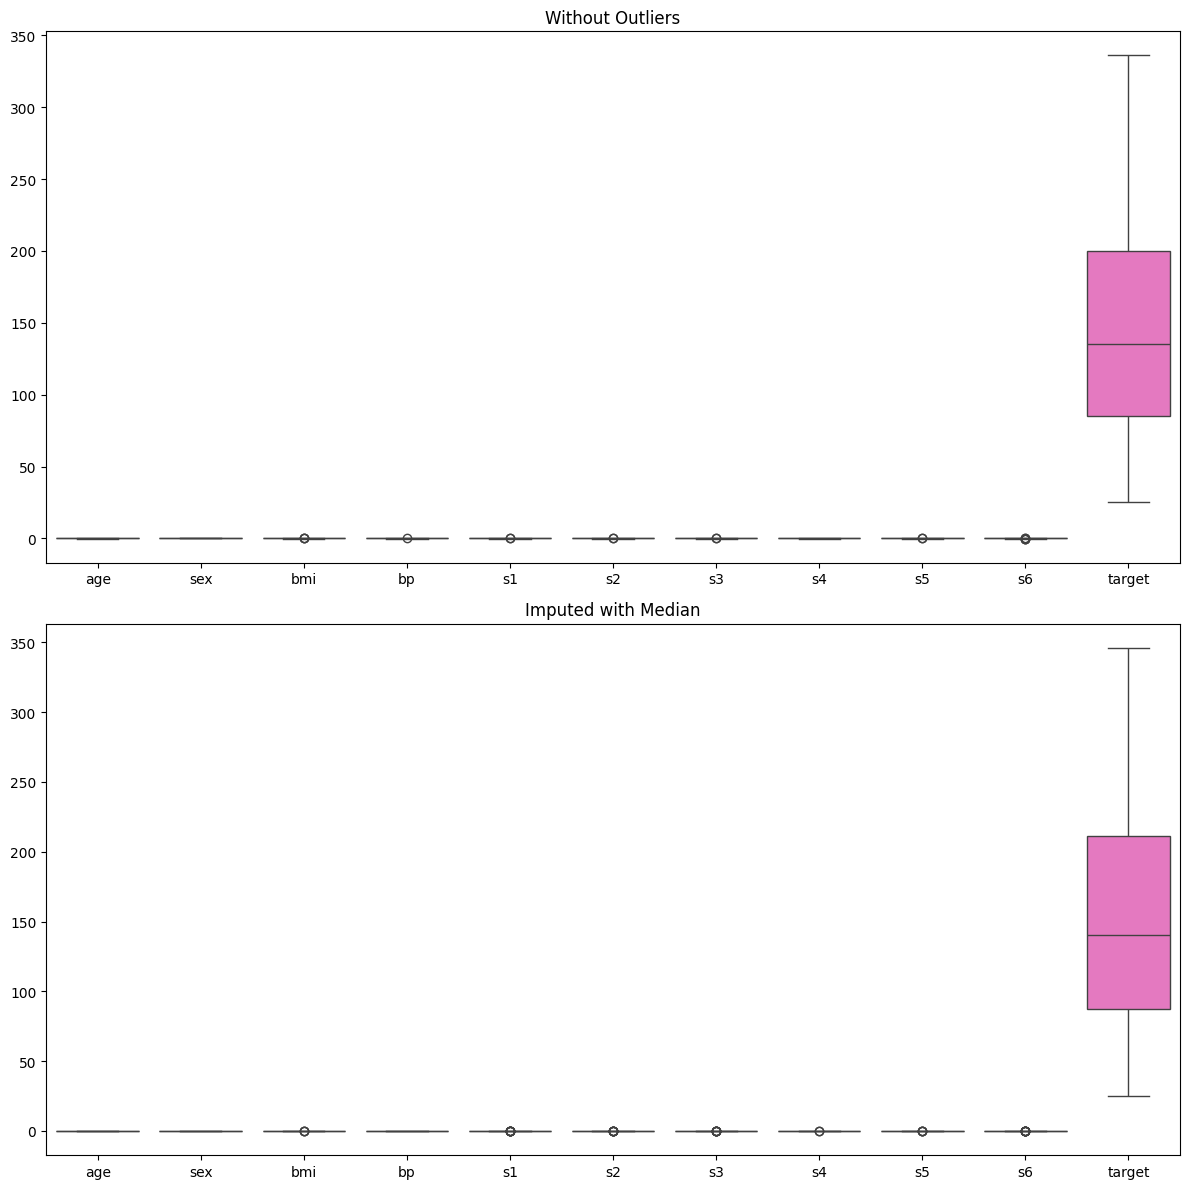

In [10]:
# 使用 Isolation Forest 检测和删除异常值
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(df)
mask = yhat != -1
df_no_outliers = df[mask]

# 使用中位数替换异常值
imputer = SimpleImputer(strategy='median')
df_imputed = df.copy()
df_imputed[df.columns] = imputer.fit_transform(df)

# 绘制处理异常值后的数据分布图
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
sns.boxplot(data=df_no_outliers, ax=axes[0])
axes[0].set_title('Without Outliers')
sns.boxplot(data=df_imputed, ax=axes[1])
axes[1].set_title('Imputed with Median')
plt.tight_layout()
plt.show()


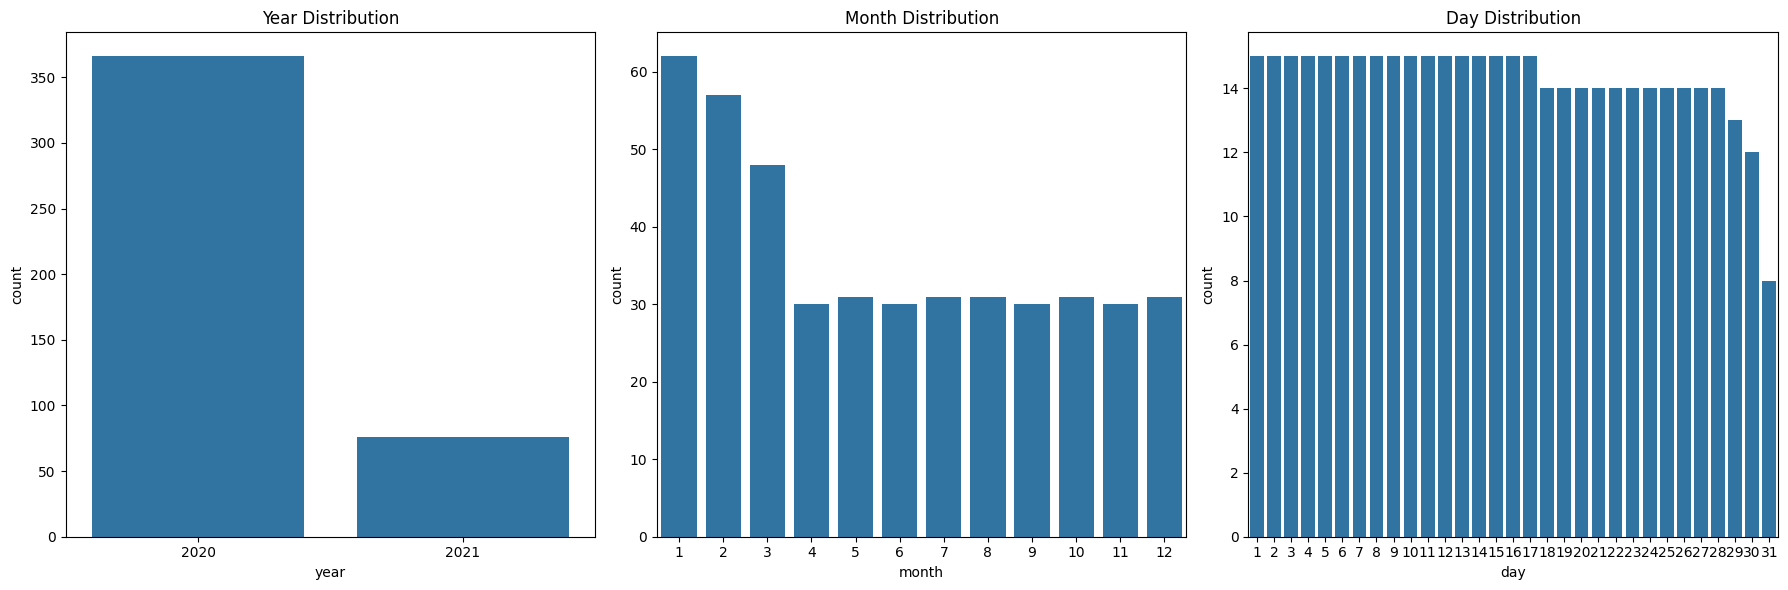

Date feature processed:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target       date  year  month  day  
0 -0.002592  0.019907 -0.017646   151.0 2020-01-01  2020      1    1  
1 -0.039493 -0.068332 -0.092204    75.0 2020-01-02  2020      1    2  
2 -0.002592  0.002861 -0.025930   141.0 2020-01-03  2020      1    3  
3  0.034309  0.022688 -0.009362   206.0 2020-01-04  2020      1    4  
4 -0.002592 -0.031988 -0.046641   135.0 2020-01-05  2020      1    5  


In [11]:
# 添加一个日期特征
df_dates = df.copy()
df_dates['date'] = pd.date_range(start='1/1/2020', periods=len(df_dates), freq='D')

# 提取年、月、日
df_dates['year'] = df_dates['date'].dt.year
df_dates['month'] = df_dates['date'].dt.month
df_dates['day'] = df_dates['date'].dt.day

# 绘制日期特征的分布图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='year', data=df_dates, ax=axes[0])
axes[0].set_title('Year Distribution')
sns.countplot(x='month', data=df_dates, ax=axes[1])
axes[1].set_title('Month Distribution')
sns.countplot(x='day', data=df_dates, ax=axes[2])
axes[2].set_title('Day Distribution')
plt.tight_layout()
plt.show()

print("Date feature processed:\n", df_dates.head())



SelectKBest features: Index(['bmi', 'bp', 's3', 's4', 's5'], dtype='object')


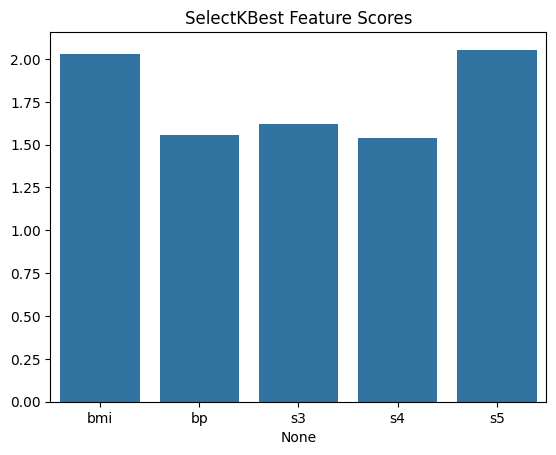

In [12]:
X = df.drop(columns='target')
y = df['target']

# 使用 SelectKBest
select_k_best = SelectKBest(score_func=f_classif, k=5)
X_selected_kbest = select_k_best.fit_transform(X, y)
selected_features_kbest = X.columns[select_k_best.get_support()]

print("SelectKBest features:", selected_features_kbest)

# 绘制选择的特征
sns.barplot(x=selected_features_kbest, y=select_k_best.scores_[select_k_best.get_support()])
plt.title('SelectKBest Feature Scores')
plt.show()


RFE features: Index(['bmi', 'bp', 's3', 's4', 's5'], dtype='object')


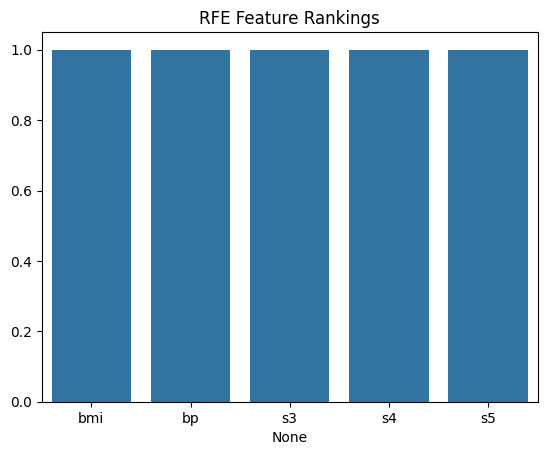

In [13]:
# 使用 RFE
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)
selected_features_rfe = X.columns[fit.support_]

print("RFE features:", selected_features_rfe)

# 绘制选择的特征
sns.barplot(x=selected_features_rfe, y=fit.ranking_[fit.support_])
plt.title('RFE Feature Rankings')
plt.show()


RandomForest features: Index(['bp', 's6', 's2', 's5', 'bmi'], dtype='object')


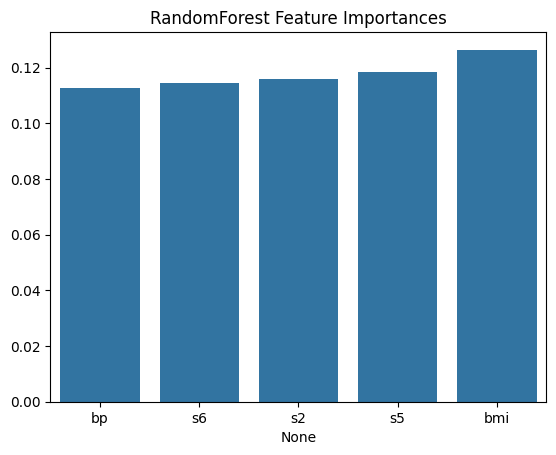

In [14]:
# 使用随机森林
model = RandomForestClassifier()
model.fit(X, y)

# 特征重要性
importances = model.feature_importances_
indices = np.argsort(importances)[-5:]
selected_features_rf = X.columns[indices]

print("RandomForest features:", selected_features_rf)

# 绘制特征重要性
sns.barplot(x=selected_features_rf, y=importances[indices])
plt.title('RandomForest Feature Importances')
plt.show()
